# K-Means Clustering of 3,500+ Violations Issued by the South Coast Air Quality Management District (SCAQMD)

The [South Coast Air Quality Management District](https://www.enveraconsulting.com/what-is-the-scaqmd/) is the local regulatory agency for most of Southern California.

As part of their core function, the AQMD ensures that all stationary sources of air emissions comply with all of the applicable rules.  This includes various state, federal and local air pollution control rules/regulations.

The AQMD has various programs in place to ensure that stationary sources comply with all applicable regulations.  These include:

* Air quality permitting
* Implementation of the Federal Title V program
* Regional Clean Air Market Incentives (RECLAIM) program
* Compliance inspections

The AQMD has more than 25,000 facilities under their jurisdiction.

## The Inspection Process

During the inspection process, an inspector will show up to a given facility and look at the equipment, permits, and records that the facility may have.  In general, the inspector is there to verify that all conditions are being met and rule compliance is being achieved. 

In the event if the inspector finds issues of non-compliance, they can take one of two actions.

First, they can issue a notice to comply (NTC), which is effectively like a fix-it-ticket.  To resolve an NTC, the facility will need to make the proper adjustments as noted by the inspector and notify the AQMD that the changes have been made. There isn't a fine associated with a notice to comply.

Second, they can issue a notice of violation.  Notices of violations 
 (NOV) are not serious than an NTC, and can include heavy fines and legal action. Depending on the situation, the fines issued by the AQMD can be up to $1 million per day per violation. 

## Project Overview

As part of this project, we sought to cluster, using k-means, more than 3,500 NOV issued by the AQMD. 

By clustering the data, we sought to find patterns or natural groupings in the dataset that may not be apparent from just looking at the data on its face. The identification of clusters in the data can be used by our customers in order better understand the most common regulations that the AQMD issues violations for. 

The data for this project was obtained via web scraping of the AQMD's website.  In addition, we also scraped all of the facility ID numbers for facilities in the Title V, RECLAIM and RECLAIM/Title V compliance programs.  This second data set was then combined with the initial list of violations to label each facility  in terms of the type of facility. 

The general approach for this project included the following steps:

* Developing the business problem
* Obtain the data
* Clean/pre-process the data
* Creating initial plots of the data
* Clustering the data using k-means
* Plotting the data
* Analyzing results
* Discussion the results

As a whole, this project can be considered to be an end-to-end project since it involved the entire data analysis workflow. 

## Key Take Aways

**First.** From a review of the top 100 tokens from each of the four types of facilities, you can see that the distribution of the tokens in each facility type, generally makes sense. 

For example, some of the most common tokens from the RECLAIM violations include `emissions`, `quarter`, `compliance`, `nox`.  All of these make sense, since we have seen all of these tokens are used to describe RECLAIM violations from past projects.

When it comes to some of the the top Title V tokens, it's clear that we see `facility`, `permit`, `submit`, `title`, `failure`. Again we have seen all of these tokens on actual violations from past clients in the Title V program.

![](./images/initial-tokens.png)

**Second.** From the work completed (elbow and silhouette methods) to determine the optimal number of clusters, we find that six clusters is best. 

When looking at a word cloud of the top 100 tokens in each cluster, a few items stand out.  First, violations related to gasoline dispensing are quite common (see clusters, 1, 3, 4, and 5).  In addition, the tokens `gasoline`, `dispensing`, and `operating` are quite common in clusters, 1, 3, and 5.  When looking at the word clouds for Cluster 4, we see that violations related to reverification tests required under [SCAQMD Rule 461](http://www.aqmd.gov/docs/default-source/rule-book/rule-iv/rule-461.pdf) are common as noted by the tokens `failure`, `conduct`, `recovery`, `vapor`, and `reverification`. 

Second, Cluster 2 seems to be related to RECLAIM violations since all of these tokens are ones that we have heard used when dealing with non-compliance at a RECLAIM facility.

Third Cluster 0 seems to be a catch all for all of the other violations that are not related to gasoline dispensing or the RECLAIM program.

![](./images/cluster-tokens.png)

Here is an initial attempt at visualizing the clusters.  These results needed to be charted after using tSNE since the initial data set had 93 features.  To reduce the dimensionality down to two, I used tSNE.

![](./images/initial-clustering.png)

In this chart, cluster 0 contains the most of the data and also contains many unique violations, as compared to the other groups. Again, we call this cluster the "catch all."

In addition, from this chart, we see that clusters 1, 3, 4, and 5 seem to be closer in proximity than say, cluster 2. This makes sense since cluster 2 are violations seem to be center around the RECLAIM program.

The disparity that is show in the plot of clusters is also substianted from the bar chart below.

![](./images/bar-chart.png)

## Text Processing
Free form text data tends to be inherently dirty.  As part of this project, we cleaned the data using the following approach.

1. Corrected incorrect facility ID numbers.
2. Corrected incorrect notice of violation numbers.
3. Removed punctuations and digits.
4. Made all of the text data lower case. 

## Future Work

Future work related this this project can include re-clustering the data using only the violations included in Cluster 0 since that cluster has the most entries and is quite possibly a catch all since it contains the most number of unique violations in the dataset.

## Misc References Used For This Project

* https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
* http://scikit-learn.org/stable/modules/manifold.html#t-sne
* http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
* https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling
* https://www.dataquest.io/blog/build-a-data-science-portfolio/
* https://www.youtube.com/watch?v=NEaUSP4YerM
* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* https://www.stat.berkeley.edu/~spector/s133/Clus.html
* https://stats.stackexchange.com/questions/10540/how-to-interpret-mean-of-silhouette-plot

***

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from string import punctuation
from sklearn.decomposition import PCA
import re
%matplotlib inline

In [2]:
file = 'http://bit.ly/aqmd-violations-final'
titlev = 'http://bit.ly/aqmd-titlev'
reclaim = 'http://bit.ly/aqmd-reclaim'

In [3]:
df_all = pd.read_csv(file)
df_titleV = pd.read_csv(titlev)
df_reclaim = pd.read_csv(reclaim)

In [4]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN


In [5]:
df_all['facility_type'] = ''

In [6]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [7]:
df_titleV.head()

,Facility ID,Facility Name,City,County,Initial Issue Date,Renewal Date
0,35188,3M COMPANY,MONROVIA,LA,6/17/13,NaN
1,800088,3M COMPANY,CORONA,RV,5/9/00,5/4/12
2,45489,"ABBOTT CARDIOVASCULAR SYSTEMS, INC.",TEMECULA,RV,10/26/01,1/11/12
3,47084,ADVANCE PAPER BOX CO,LOS ANGELES,LA,8/13/01,9/16/11
4,57390,ADVANCE TRUCK PAINTING INC,PICO RIVERA,LA,4/16/01,6/7/11


In [8]:
df_reclaim.head()

,Fac_id
0,136
1,346
2,550
3,1073
4,1744


In [9]:
reclaim_list = df_reclaim['Fac_id'].tolist()

In [10]:
titlev_list = df_titleV['Facility ID'].tolist()

In [11]:
reclaim_titlev_list = [facility for facility in titlev_list if facility in reclaim_list]

In [12]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        WBW
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipment                                                       NaN
 facility_type                                                      
 Name: 475, dtype: object,
 facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        FAC
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipm

In [13]:
for each in list_error:
    print(each['facility id'])

16, 20
16, 20
16, 20
2344 2
202, 2
31, 20
31, 20
10/1
10/1
10/1


In [14]:
for each in list_error:
    print(each['notification'])

P57290
P57290
P57290
P63673
HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [15]:
df_all.iloc[475]['facility id']
df_all.set_value(475, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [16]:
df_all.iloc[476]
df_all.set_value(476, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [17]:
df_all.iloc[477]
df_all.set_value(477, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [18]:
df_all.iloc[1284]
df_all.set_value(1284, 'facility id', '2344')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [19]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  202, 2
 notification                                                HRB2169
 Attorney                                                        INT
 Total                                                          1000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equipment                                                       NaN
 facility_type                                                      
 Name: 1695, dtype: object,
 facility id                                                  31, 20
 notification                                                  SRV97
 Attorney                                                        WBW
 Total                                                        213376
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equip

In [20]:
for each in list_error:
    print(each['facility id'])

202, 2
31, 20
31, 20
10/1
10/1
10/1


In [21]:
for each in list_error:
    print(each['notification'])

HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [22]:
df_all.drop(df_all.index[1695])

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [23]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

1695
2066
2067
3138
3140
3141


In [24]:
df_all = df_all.drop(df_all.index[[1695,
2066,
2067,
3138,
3140,
3141]])

In [25]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

In [26]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [27]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in titlev_list:
            df_all.set_value(index, 'facility_type', 't')
        elif float(row['facility id']) in reclaim_list:
            df_all.set_value(index, 'facility_type', 'r')
        else:
            df_all.set_value(index, 'facility_type', 'n')
    except:
        index_row.append(row)
index_row

[]

In [28]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in reclaim_titlev_list:
            df_all.set_value(index, 'facility_type', 'rt')
    except:
        index_row.append(row)
index_row

[]

In [29]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,n


In [30]:
df_all.shape

(3682, 8)

In [31]:
df_rt = df_all[(df_all['facility_type'] == 'rt')]
df_rt.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
19,11034,P55543,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,The electronic report of daily mass emissions ...,NaN,rt
20,800026,SRV105,KCM,71200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,NaN,NaN,rt
69,800408,P59376,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating Device #C160 contrary to permit cond...,NaN,rt


In [32]:
df_facility_average = df_all.groupby(['facility_type'], as_index=False).mean()
df_facility_average

,facility_type,Total
0,n,11762.097454
1,r,38479.358108
2,rt,523801.033898
3,t,446882.295084


In [33]:
punctuation_symbols = []
for each in list(punctuation):
    punctuation_symbols.append((each))

In [34]:
set(df_all['facility_type'].tolist())

{'n', 'r', 'rt', 't'}

In [35]:
len(df_all['facility_type'].tolist())

3682

In [36]:
df_all = df_all.dropna(subset=['violation_data'])
df_all.shape

(3336, 8)

In [37]:
def remove_puncuation(d):
    for each in punctuation_symbols:
        d = d.replace(each, '')
    return d

In [38]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [39]:
df_all['violation_data'] = df_all.violation_data.apply(remove_digits)
df_all['violation_data'] = df_all.violation_data.apply(remove_puncuation)
df_all['violation_data'] = df_all['violation_data'].str.lower()

In [40]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n


In [41]:
df_all['trim_violation_text'] = ''
for index, row in df_all.iterrows():
    df_all.set_value(index, 'trim_violation_text', re.sub(r' +', ' ', str(row['violation_data'])))
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,trim_violation_text
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,failed to reconcile quarterly nox emissions in...
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,inaccurate qcers inaccurate apep
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,failure to keep the roof of internal floating ...
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,failure to operate and maintain a continuous m...
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,selling architectural coatings within the scaq...


In [42]:
df_all['violation_data'].isnull().sum()

0

In [43]:
df_all.shape

(3336, 9)

In [44]:
sunshine = ['49111']

df_all2 = df_all.loc[~df_all['facility id'].isin(sunshine)].reset_index(drop=True)

In [45]:
df_all2.shape

(3204, 9)

In [46]:
facility_type_ = dict()
type_list = ['rt', 't', 'r', 'n']
for each in type_list:
    text = ' '.join(df_all2.loc[df_all2['facility_type'] == each, 'trim_violation_text'].values)
    facility_type_[each] = word_tokenize(text)

In [47]:
none_top100 = Counter(facility_type_['n']).most_common(100)
reclaim_top100 = Counter(facility_type_['r']).most_common(100)
titlev_top100 = Counter(facility_type_['t']).most_common(100)
reclaim_titlev_top100 = Counter(facility_type_['rt']).most_common(100)

In [48]:
def create_wordcloud(d):
    wordcloud = WordCloud(background_color='white',
                          max_words=75, 
                          max_font_size=40,
                          random_state=42).generate(str(d))
    return wordcloud

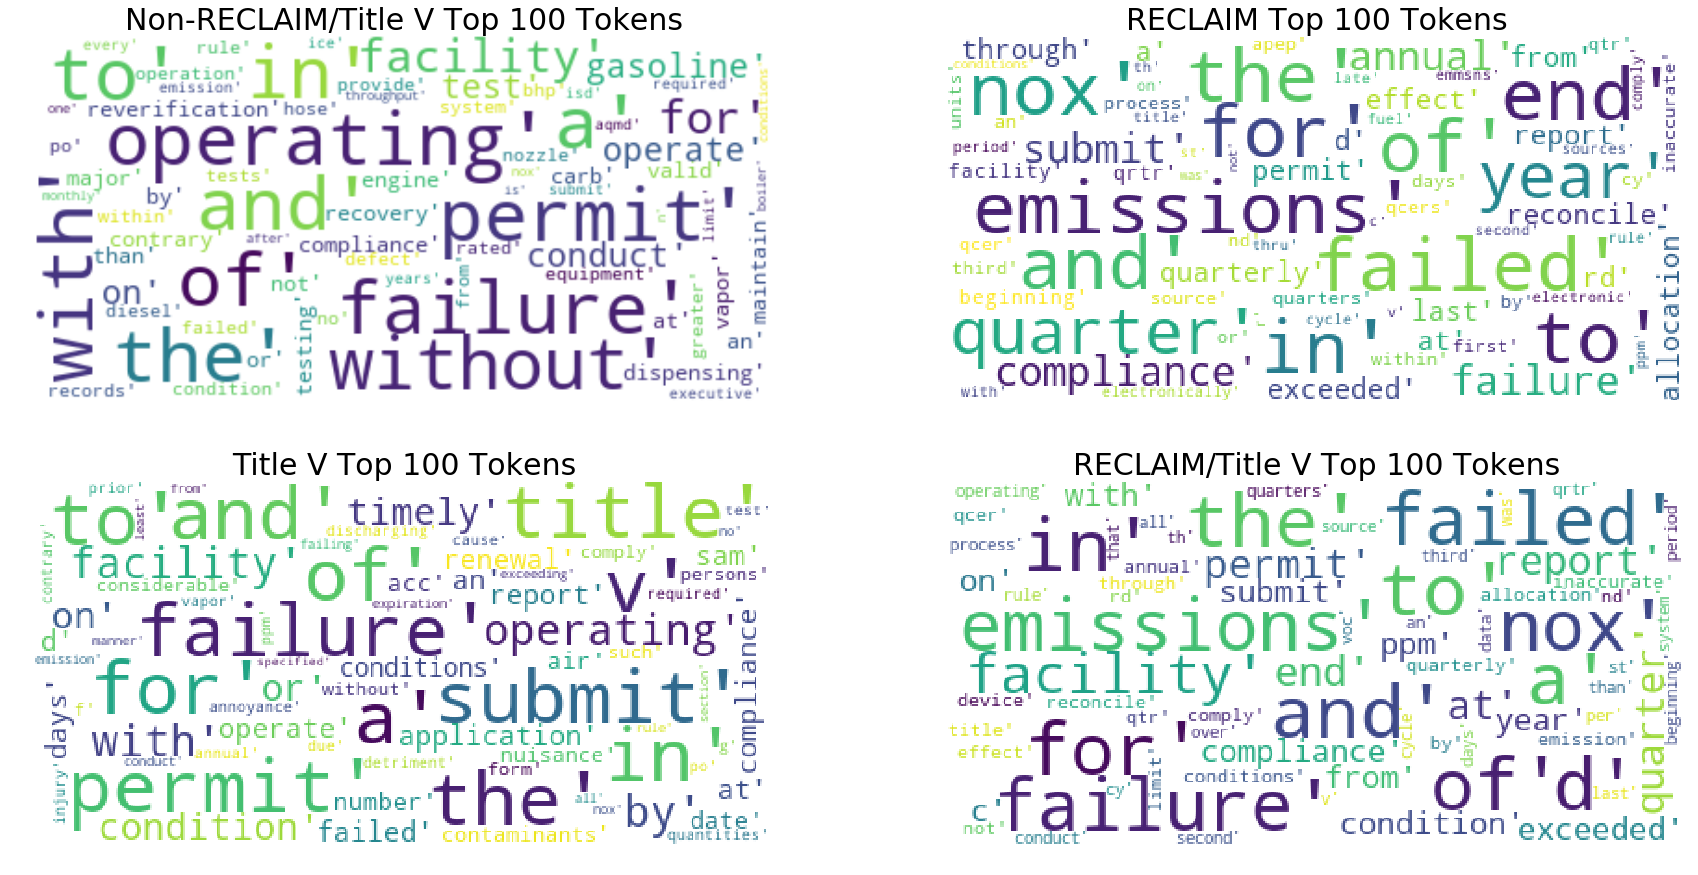

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

ax = axes[0, 0]
ax.imshow(create_wordcloud(none_top100), interpolation="bilinear")
ax.axis('off')
ax.set_title("Non-RECLAIM/Title V Top 100 Tokens", fontsize=30)

ax = axes[0, 1]
ax.imshow(create_wordcloud(reclaim_top100))
ax.axis('off')
ax.set_title("RECLAIM Top 100 Tokens", fontsize=30)

ax = axes[1, 0]
ax.imshow(create_wordcloud(titlev_top100))
ax.axis('off')
ax.set_title("Title V Top 100 Tokens", fontsize=30)

ax = axes[1, 1]
ax.imshow(create_wordcloud(reclaim_titlev_top100))
ax.axis('off')
ax.set_title("RECLAIM/Title V Top 100 Tokens", fontsize=30)
plt.show()

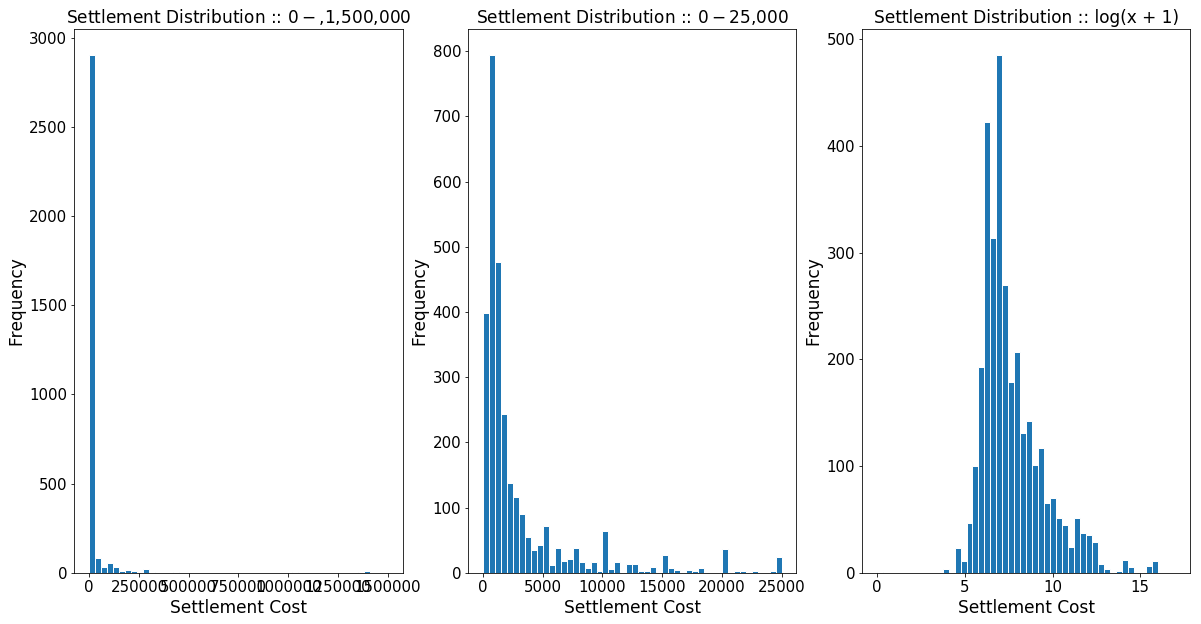

In [50]:
plt.subplot(1, 3, 1)
(df_all2['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_all2['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_all2['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

#https://www.quora.com/What-are-the-downsides-when-using-log-x-+-1-as-ones-log-transformation
#http://onbiostatistics.blogspot.com/2012/05/logx1-data-transformation.html

In [51]:
facility_count = df_all2[['Total','facility_type']].groupby(['facility_type'], as_index =False).count()
facility_count

,facility_type,Total
0,n,2552
1,r,142
2,rt,282
3,t,228


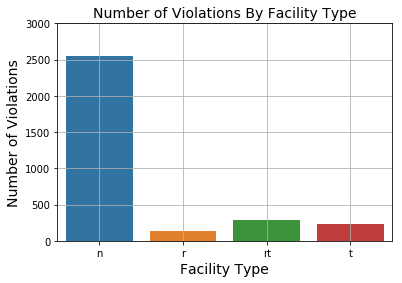

In [52]:
sns.barplot(facility_count['facility_type'], facility_count['Total'])
plt.grid(True)
plt.ylim(0, 3000, 100)
plt.xlabel('Facility Type', fontsize = 14)
plt.ylabel('Number of Violations', fontsize = 14)
plt.title('Number of Violations By Facility Type', fontsize = 14)
plt.show()

In [53]:
df_none = df_all2[df_all2['facility_type'] == 'n'].reset_index(drop=True)
df_rt = df_all2[df_all2['facility_type'] == 'rt'].reset_index(drop=True)
df_r = df_all2[df_all2['facility_type'] == 'r'].reset_index(drop=True)
df_t = df_all2[df_all2['facility_type'] == 't'].reset_index(drop=True)

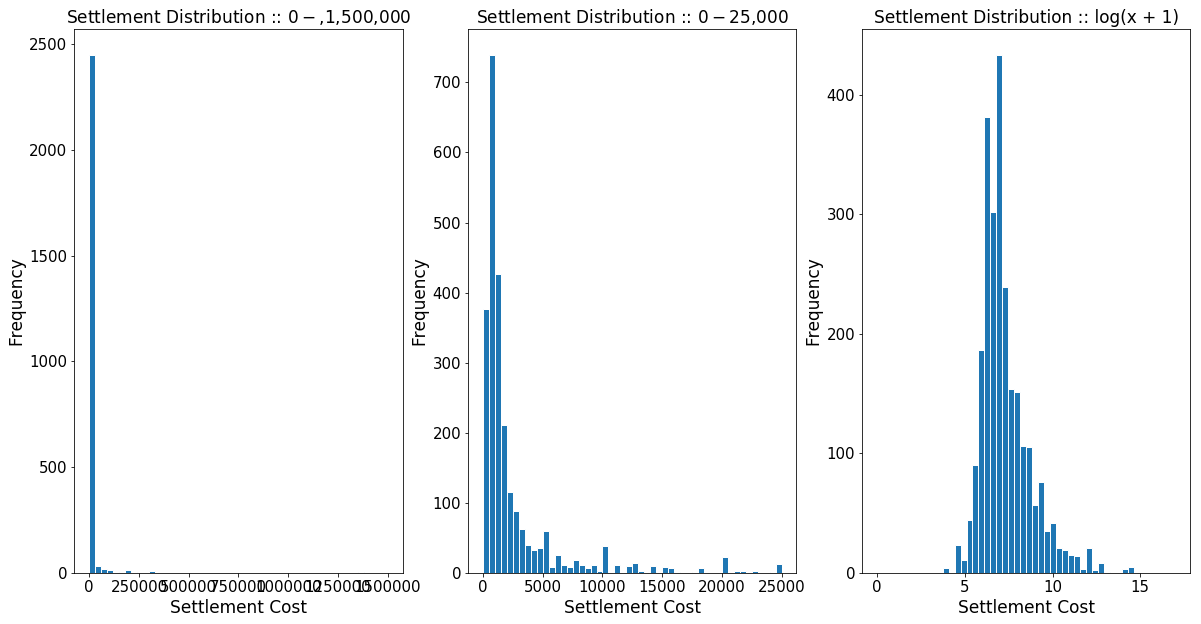

In [54]:
plt.subplot(1, 3, 1)
(df_none['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_none['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_none['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

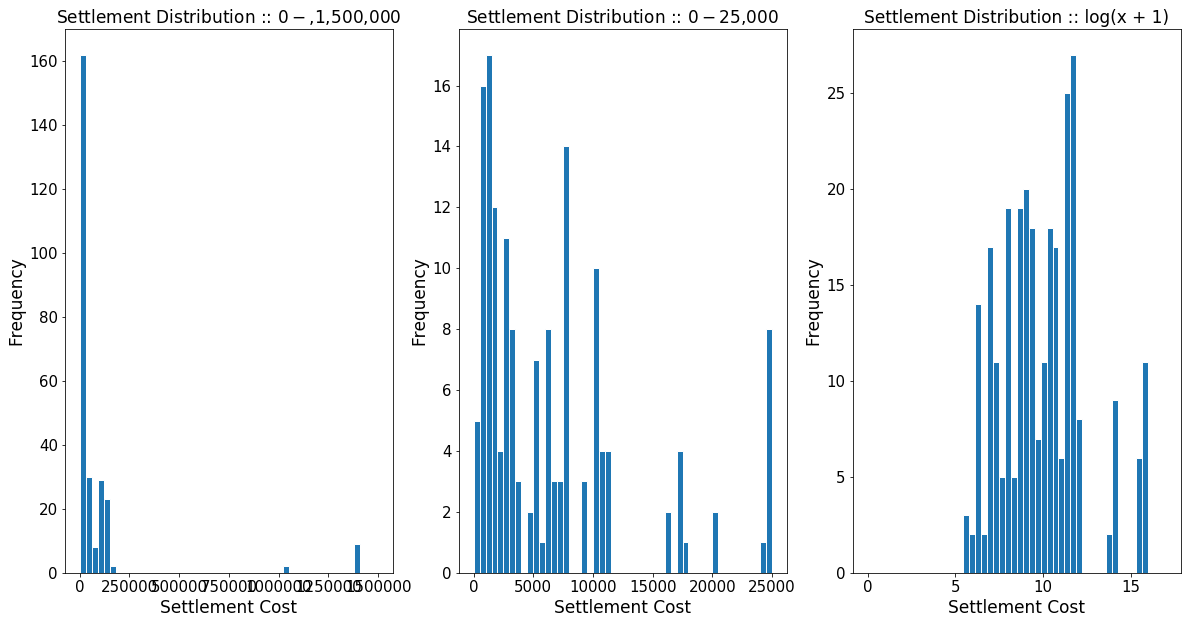

In [55]:
plt.subplot(1, 3, 1)
(df_rt['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_rt['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_rt['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

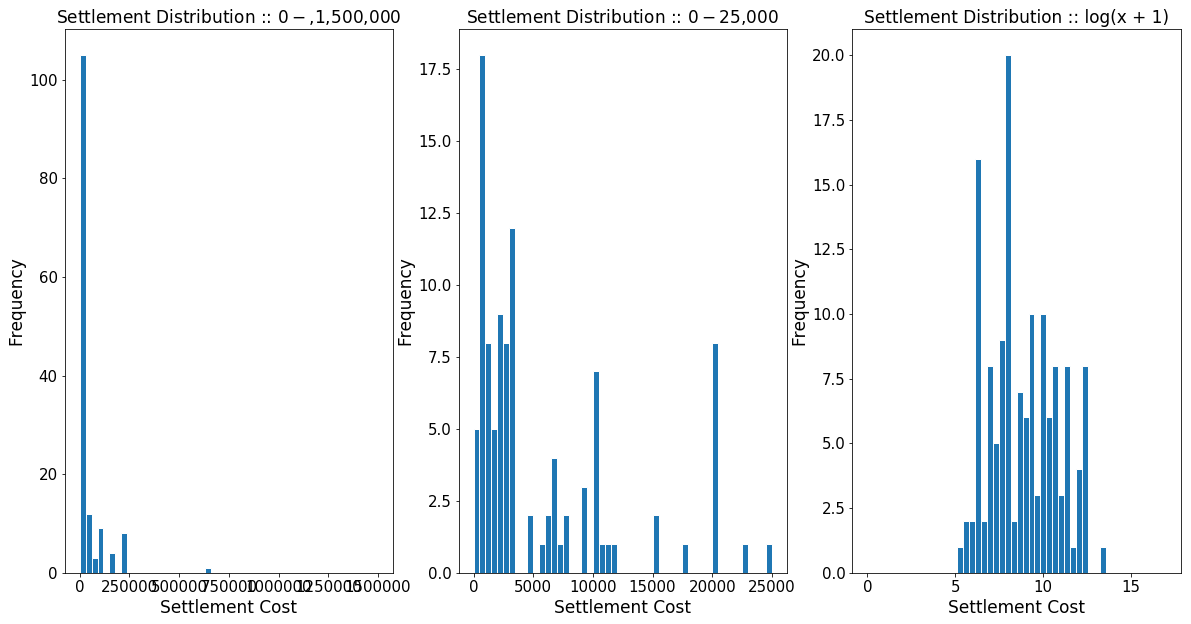

In [56]:
plt.subplot(1, 3, 1)
(df_r['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_r['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_r['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

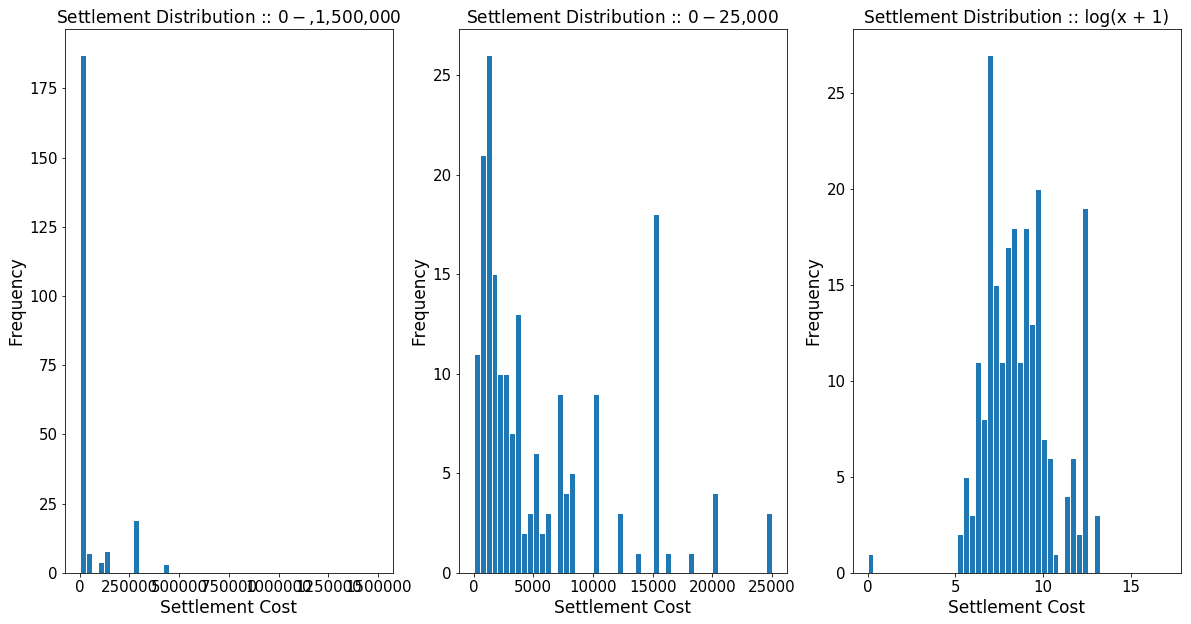

In [57]:
plt.subplot(1, 3, 1)
(df_t['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_t['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_t['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

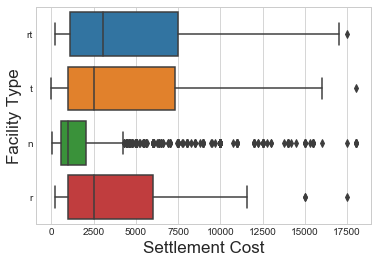

In [58]:
sns.set_style('whitegrid')
data = df_all2[df_all2['Total'] < 20000]
ax = sns.boxplot(x="Total", y="facility_type", data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Facility Type', fontsize=17)
plt.show()

In [59]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))

In [60]:
X = df_all2['violation_data']
y = df_all2['facility_type']

In [61]:
def determine_length(d):
    d = d.split(' ')
    return len(d)

In [62]:
df_all2['violation_length'] = df_all2['trim_violation_text'].apply(determine_length)

In [63]:
df_all2.iloc[1]['trim_violation_text'].split(' ')

['inaccurate', 'qcers', 'inaccurate', 'apep']

In [64]:
df_all2.iloc[1]['violation_length']

4

In [65]:
df_all2.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,trim_violation_text,violation_length
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,failed to reconcile quarterly nox emissions in...,42
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,inaccurate qcers inaccurate apep,4
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,failure to keep the roof of internal floating ...,22
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,failure to operate and maintain a continuous m...,14
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,selling architectural coatings within the scaq...,25


In [66]:
df_len_cost = df_all2[['Total', 'violation_length']].groupby(['violation_length'], as_index=False).mean()
df_len_cost.head()

,violation_length,Total
0,1,5187.500000
1,2,765327.272727
2,3,35393.750000
3,4,31681.250000
4,5,121657.500000


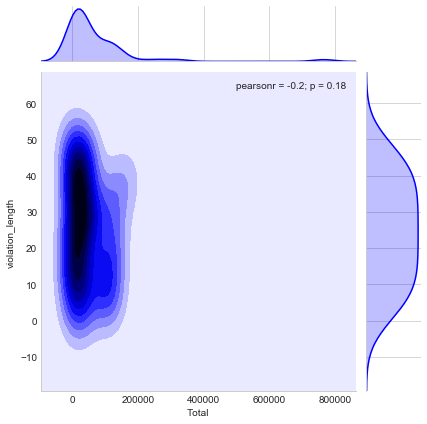

In [67]:
plt.figure(figsize = (10, 10))
sns.jointplot(x=df_len_cost["Total"], y=df_len_cost["violation_length"], kind='kde', color = 'b')
plt.show()

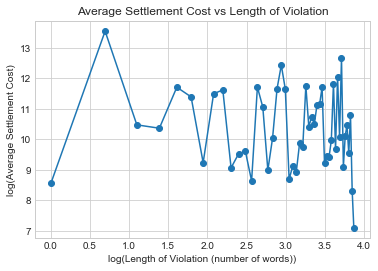

In [68]:
x = np.log(df_len_cost['violation_length'])
y = np.log(df_len_cost['Total'])
plt.scatter(x, y)
plt.plot(x, y)
plt.ylabel('log(Average Settlement Cost)')
plt.xlabel('log(Length of Violation (number of words))')
plt.title('Average Settlement Cost vs Length of Violation')
plt.show()

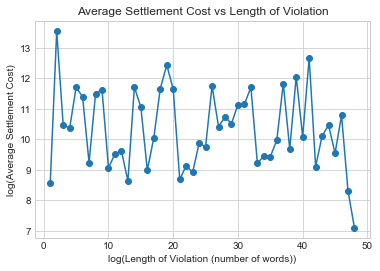

In [69]:
x = (df_len_cost['violation_length'])
y = np.log(df_len_cost['Total'])
plt.scatter(x, y)
plt.plot(x, y)
plt.ylabel('log(Average Settlement Cost)')
plt.xlabel('log(Length of Violation (number of words))')
plt.title('Average Settlement Cost vs Length of Violation')
plt.show()

This is a PCA of the initial dataset using `n_components = 2`

In [70]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(X_dtm.toarray())
print('Size of Feature Vector is: ', len(X_dtm.toarray()[0]))

Size of Feature Vector is:  93


In [71]:
pca.explained_variance_ratio_

array([ 0.22309807,  0.10474629])

In [72]:
print('Total Variance', (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100, '%')

Total Variance 32.7844360176 %


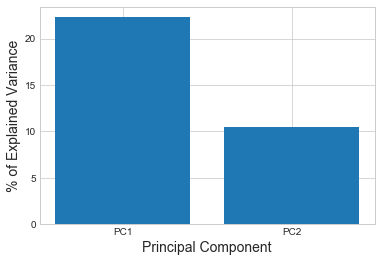

In [73]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('% of Explained Variance', fontsize = 14)
plt.show()

In [74]:
pca_df = pd.DataFrame(pca_results, columns=['x', 'y'])
pca_df['violation_text'] = df_all2['violation_data']
pca_df['facility_type'] = df_all2['facility_type']
pca_df['Total_Settlement'] = df_all2['Total']

In [75]:
pca_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,-0.371814,2.367826,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,-0.226319,-0.061811,inaccurate qcers inaccurate apep,rt,7200.00
2,-0.226319,-0.061811,failure to keep the roof of internal floating ...,t,3500.00
3,-0.226319,-0.061811,failure to operate and maintain a continuous m...,t,3500.00
4,-0.226319,-0.061811,selling architectural coatings within the scaq...,n,9438.66


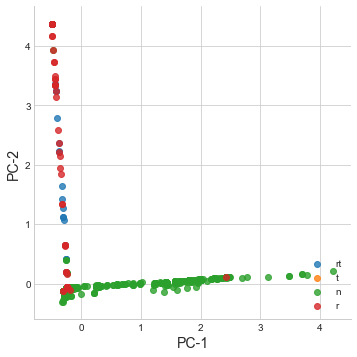

In [76]:
sns.lmplot( x="x", y="y", data=pca_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.xlabel('PC-1', fontsize = 14)
plt.ylabel('PC-2', fontsize = 14)
plt.show()

In [77]:
pc1_df = pca_df[(pca_df['x'] < 0) & (pca_df['y'] > 0)].reset_index(drop=True)
pc1_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,-0.371814,2.367826,failed to reconcile quarterly nox emissions in...,rt,7200.0
1,-0.490404,4.381286,failed to reconcile quarterly nox emissions in...,r,25000.0
2,-0.429718,3.347712,failed to reconcile quarterly nox emissions in...,r,150000.0
3,-0.433013,3.446403,failed to reconcile quarterly nox emissions in...,r,32500.0
4,-0.490404,4.381286,failed to reconcile quarterly nox emissions in...,r,32500.0


This is a tSNE of the initial dataset using `learning_rate=100` and `perplexity=40`

In [78]:
X = df_all2['violation_data']
y = df_all2['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)

In [79]:
start = time.time()

model = TSNE(learning_rate=100, perplexity=40)
transformed = model.fit_transform(X_dtm.toarray())

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  92.90649127960205 seconds


In [80]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = df_all2['trim_violation_text']
tsne_df['facility_type'] = df_all2['facility_type']
tsne_df['Total_Settlement'] = df_all2['Total']
tsne_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,39.678600,16.175026,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,6.479424,1.145972,inaccurate qcers inaccurate apep,rt,7200.00
2,6.818964,2.433067,failure to keep the roof of internal floating ...,t,3500.00
3,6.990683,3.681028,failure to operate and maintain a continuous m...,t,3500.00
4,6.514506,-0.118133,selling architectural coatings within the scaq...,n,9438.66


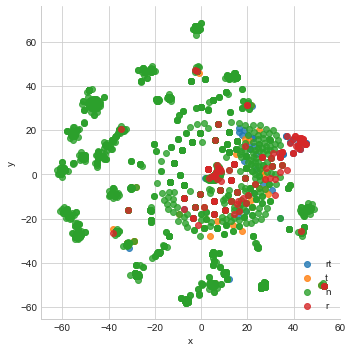

In [81]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

This is a SVD of the initial dataset using `n_components = 2`

In [82]:
X = df_all2['violation_data']
y = df_all2['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)

In [83]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_ctv = svd.fit_transform(X_dtm)

In [84]:
svd_df = pd.DataFrame(svd_ctv, columns=['x', 'y'])
svd_df['violation_text'] = df_all2['trim_violation_text']
svd_df['facility_type'] = df_all2['facility_type']
svd_df['Total_Settlement'] = df_all2['Total']
svd_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,-1.483034e-07,2.441418e+00,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,5.726904e-17,-8.194927e-16,inaccurate qcers inaccurate apep,rt,7200.00
2,-6.833159e-18,5.567252e-18,failure to keep the roof of internal floating ...,t,3500.00
3,1.596425e-17,-1.638889e-16,failure to operate and maintain a continuous m...,t,3500.00
4,1.559230e-19,7.500942e-17,selling architectural coatings within the scaq...,n,9438.66


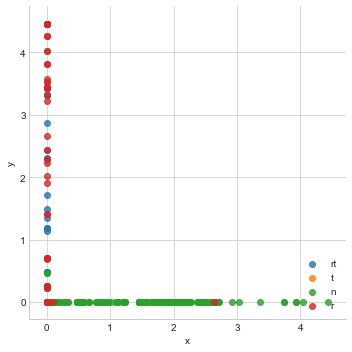

In [85]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=svd_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

## k-Means on the initial dataset

In [86]:
X = df_all2['trim_violation_text']
y = df_all2['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)
print('Size of Feature Vector is: ', len(X_dtm.toarray()[0]))

Size of Feature Vector is:  93


In [87]:
start = time.time()

metric_ = []
silhouette_avg_ = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X_dtm)
    metric_.append(kmeans.inertia_)
    labels = kmeans.predict(X_dtm)
    silhouette_avg = silhouette_score(X_dtm, labels)
    silhouette_avg_.append(silhouette_avg)

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  14.064465999603271 seconds


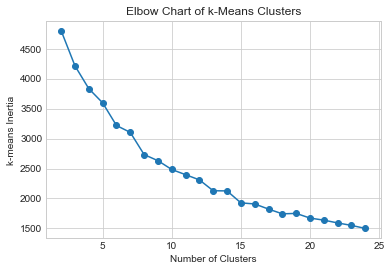

In [88]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, metric_)
plt.plot(cluster, metric_)
plt.ylabel('k-means Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Chart of k-Means Clusters')
plt.show()

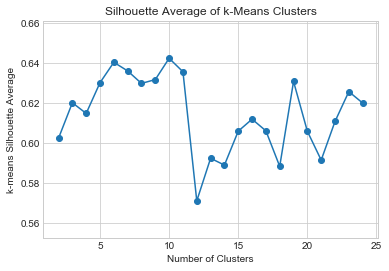

In [89]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, silhouette_avg_)
plt.plot(cluster, silhouette_avg_)
plt.ylabel('k-means Silhouette Average')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Average of k-Means Clusters')
plt.show()

In [90]:
silhouette_avg_

[0.60241029031399684,
 0.62015168039939439,
 0.61481893669484877,
 0.6302003614998678,
 0.64042400301634184,
 0.63609438445326438,
 0.62984720062006705,
 0.63176938159075435,
 0.64243169391604271,
 0.63567493853020973,
 0.57100310038588731,
 0.59234221762674599,
 0.58892604355603584,
 0.60592643838636895,
 0.61193787690966295,
 0.6060888240305774,
 0.58829540863535312,
 0.63082563256988378,
 0.605879799780354,
 0.59142422079704249,
 0.61078687756101635,
 0.62573499345047134,
 0.62001885422017888]

In [91]:
silhouette_avg_[4]

0.64042400301634184

In [92]:
X_dtm = vect.fit_transform(X)
kmeans = KMeans(n_clusters=6, random_state=10)
kmeans.fit(X_dtm)
labels = kmeans.predict(X_dtm)
labels

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [93]:
kmeans_df = pd.DataFrame()
kmeans_df['violation_text'] = df_all2['trim_violation_text']
kmeans_df['facility_type'] = df_all2['facility_type']
kmeans_df['Total_Settlement'] = df_all2['Total']
kmeans_df['Cluster'] = labels
kmeans_df['notification'] = df_all2['notification']
kmeans_df['facility_id'] = df_all2['facility id']
kmeans_df.head(10)

,violation_text,facility_type,Total_Settlement,Cluster,notification,facility_id
0,failed to reconcile quarterly nox emissions in...,rt,7200.00,2,P56324,3704
1,inaccurate qcers inaccurate apep,rt,7200.00,0,P56323,3704
2,failure to keep the roof of internal floating ...,t,3500.00,0,P37231,2526
3,failure to operate and maintain a continuous m...,t,3500.00,0,P37230,2526
4,selling architectural coatings within the scaq...,n,9438.66,0,P60306,158141
5,failure to conduct reverification test months ...,n,1000.00,0,P59039,115862
6,failure to post permit on site failure to prov...,n,1000.00,0,P61478,115862
7,operating a gasoline dispensing facility contr...,n,1000.00,1,P61475,115862
8,two vapor recovery hoses leaking above ppm voc...,t,3000.00,0,P52622,800057
9,operating an ajax boiler rated at million btuh...,n,2500.00,0,P61702,84456


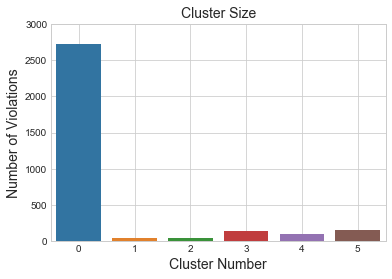

In [94]:
cluster_df = kmeans_df[['Cluster', 'violation_text']].groupby(['Cluster'], as_index=False).count()
sns.barplot(cluster_df['Cluster'], cluster_df['violation_text'])
plt.grid(True)
plt.ylim(0, 3000, 100)
plt.xlabel('Cluster Number', fontsize = 14)
plt.ylabel('Number of Violations', fontsize = 14)
plt.title('Cluster Size', fontsize = 14)
plt.show()

In [95]:
kmeans_df[kmeans_df['Cluster'] ==  2].to_csv('cluster2.csv', index=False)

In [96]:
facility_type_ = dict()
type_list = range(0, 7)
for each in type_list:
    text = ' '.join(kmeans_df.loc[kmeans_df['Cluster'] == each, 'violation_text'].values)
    facility_type_[each] = word_tokenize(text)

In [97]:
Counter(facility_type_[0]).most_common(20)

[('to', 3369),
 ('the', 1781),
 ('of', 1743),
 ('failure', 1624),
 ('a', 1611),
 ('and', 1173),
 ('operating', 1062),
 ('permit', 998),
 ('for', 927),
 ('in', 807),
 ('without', 773),
 ('with', 708),
 ('operate', 501),
 ('test', 464),
 ('on', 454),
 ('compliance', 431),
 ('an', 424),
 ('conduct', 419),
 ('facility', 408),
 ('not', 373)]

In [98]:
Counter(facility_type_[1]).most_common(20)

[('and', 76),
 ('a', 70),
 ('operating', 48),
 ('dispensing', 48),
 ('gasoline', 46),
 ('to', 46),
 ('contrary', 44),
 ('carb', 44),
 ('executive', 43),
 ('orders', 43),
 ('facility', 41),
 ('with', 38),
 ('manufacturers', 37),
 ('specifications', 34),
 ('major', 33),
 ('on', 26),
 ('defect', 18),
 ('defects', 14),
 ('insertion', 14),
 ('interlock', 14)]

In [99]:
Counter(facility_type_[2]).most_common(20)

[('the', 343),
 ('of', 153),
 ('emissions', 131),
 ('nox', 128),
 ('in', 86),
 ('end', 86),
 ('quarter', 59),
 ('compliance', 52),
 ('year', 52),
 ('to', 46),
 ('through', 46),
 ('reconcile', 45),
 ('from', 45),
 ('exceeded', 45),
 ('failed', 44),
 ('annual', 44),
 ('allocation', 44),
 ('at', 43),
 ('beginning', 42),
 ('effect', 42)]

In [100]:
Counter(facility_type_[3]).most_common(20)

[('a', 270),
 ('operating', 154),
 ('gasoline', 154),
 ('dispensing', 153),
 ('with', 152),
 ('facility', 150),
 ('major', 144),
 ('on', 114),
 ('to', 108),
 ('defect', 101),
 ('and', 83),
 ('failure', 54),
 ('hose', 53),
 ('pump', 52),
 ('down', 35),
 ('breakaway', 34),
 ('interlock', 32),
 ('in', 32),
 ('upside', 30),
 ('faulty', 29)]

In [101]:
Counter(facility_type_[4]).most_common(20)

[('to', 173),
 ('failure', 145),
 ('conduct', 124),
 ('vapor', 116),
 ('recovery', 111),
 ('a', 91),
 ('testing', 73),
 ('of', 60),
 ('reverification', 54),
 ('with', 44),
 ('test', 44),
 ('facility', 38),
 ('annually', 38),
 ('for', 36),
 ('tests', 34),
 ('monthly', 33),
 ('semiannually', 30),
 ('as', 30),
 ('required', 30),
 ('gasoline', 29)]

In [102]:
Counter(facility_type_[5]).most_common(20)

[('a', 236),
 ('to', 235),
 ('operating', 190),
 ('gasoline', 182),
 ('facility', 170),
 ('dispensing', 167),
 ('permit', 120),
 ('contrary', 96),
 ('without', 62),
 ('failure', 61),
 ('carb', 56),
 ('and', 55),
 ('with', 53),
 ('of', 51),
 ('operate', 48),
 ('valid', 45),
 ('isd', 44),
 ('in', 42),
 ('conduct', 29),
 ('n', 29)]

In [103]:
group_zero = Counter(facility_type_[0]).most_common(100)
group_one = Counter(facility_type_[1]).most_common(100)
group_two = Counter(facility_type_[2]).most_common(100)
group_three = Counter(facility_type_[3]).most_common(100)
group_four = Counter(facility_type_[4]).most_common(100)
group_five = Counter(facility_type_[5]).most_common(100)

In [104]:
def create_wordcloud(d):
    wordcloud = WordCloud(background_color='white',
                          max_words=50, 
                          max_font_size=40,
                          random_state=42).generate(str(d))
    return wordcloud

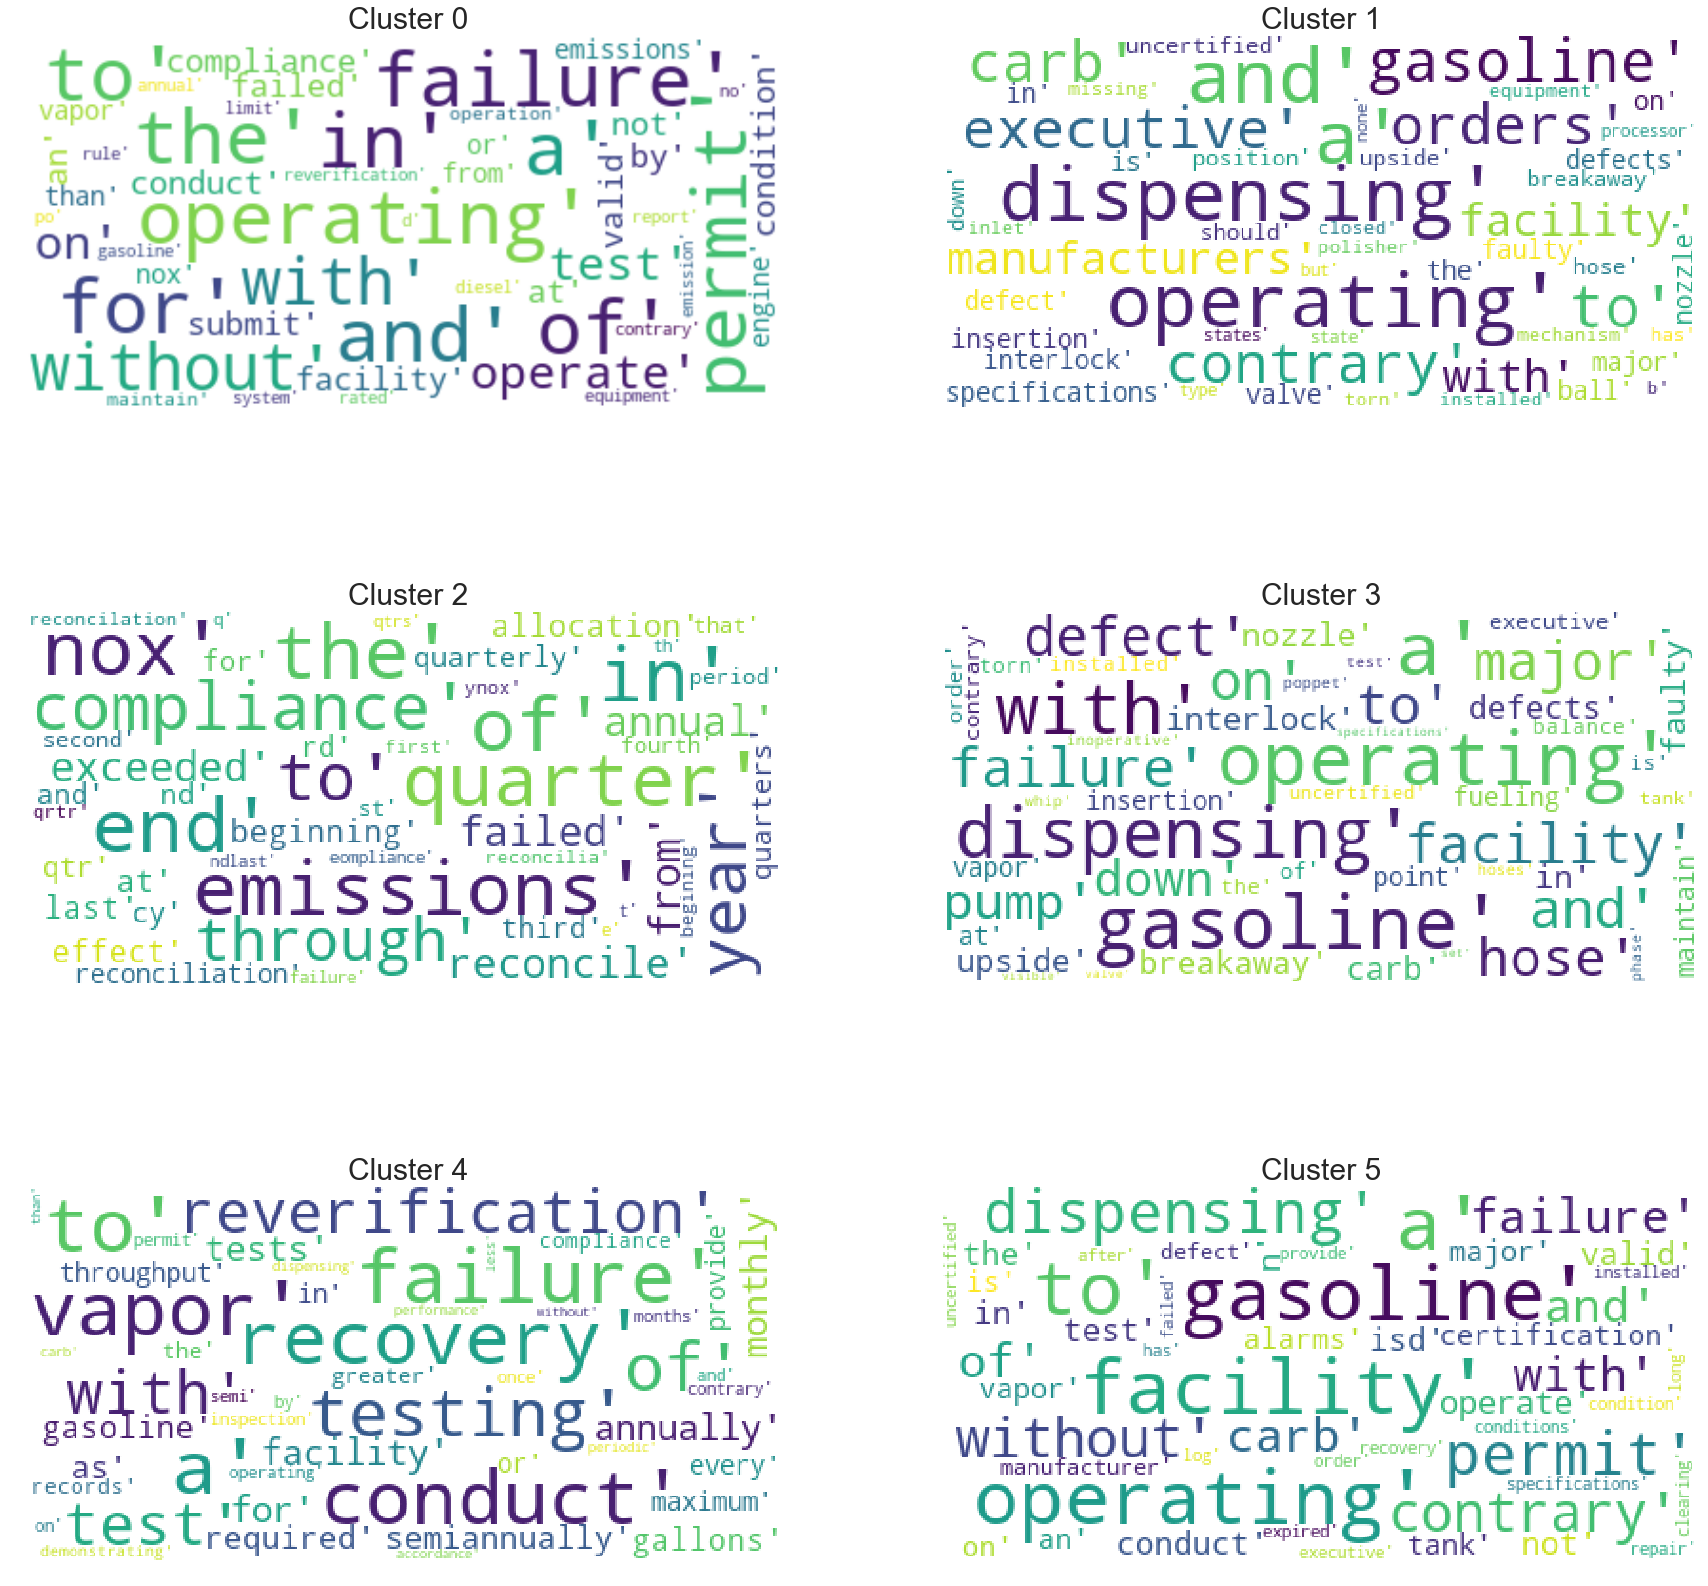

In [105]:
fig, axes = plt.subplots(3, 2, figsize=(30, 30))

ax = axes[0, 0]
ax.imshow(create_wordcloud(group_zero), interpolation="bilinear")
ax.axis('off')
ax.set_title("Cluster 0", fontsize=30)

ax = axes[0, 1]
ax.imshow(create_wordcloud(group_one))
ax.axis('off')
ax.set_title("Cluster 1", fontsize=30)

ax = axes[1, 0]
ax.imshow(create_wordcloud(group_two))
ax.axis('off')
ax.set_title("Cluster 2", fontsize=30)

ax = axes[1, 1]
ax.imshow(create_wordcloud(group_three))
ax.axis('off')
ax.set_title("Cluster 3", fontsize=30)

ax = axes[2, 0]
ax.imshow(create_wordcloud(group_four))
ax.axis('off')
ax.set_title("Cluster 4", fontsize=30)

ax = axes[2, 1]
ax.imshow(create_wordcloud(group_five))
ax.axis('off')
ax.set_title("Cluster 5", fontsize=30)
plt.show()

plt.show()

In [106]:
df_cross_tab = kmeans_df.iloc[:, 1:4]
cross_tab_summary = pd.crosstab(df_cross_tab['facility_type'], df_cross_tab['Cluster'])
cross_tab_summary 

Cluster,0,1,2,3,4,5
facility_type,,,,,,
n,2114,41,1,144,96,156
r,115,1,26,0,0,0
rt,262,1,19,0,0,0
t,228,0,0,0,0,0


In [107]:
start = time.time()

model = TSNE(learning_rate=100, perplexity=50)
transformed = model.fit_transform(X_dtm.toarray())

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  108.077472448349 seconds


In [108]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = kmeans_df['violation_text']
tsne_df['facility_type'] = kmeans_df['facility_type']
tsne_df['Total_Settlement'] = kmeans_df['Total_Settlement'] 
tsne_df['Cluster'] = labels

In [109]:
tsne_df.head()

,x,y,violation_text,facility_type,Total_Settlement,Cluster
0,-35.802349,0.344051,failed to reconcile quarterly nox emissions in...,rt,7200.00,2
1,-2.791166,6.592458,inaccurate qcers inaccurate apep,rt,7200.00,0
2,-2.893178,5.940029,failure to keep the roof of internal floating ...,t,3500.00,0
3,-3.235329,6.039925,failure to operate and maintain a continuous m...,t,3500.00,0
4,0.080143,3.664398,selling architectural coatings within the scaq...,n,9438.66,0


In [110]:
tsne_df.shape

(3204, 6)

In [111]:
tsne_df['violation_text'].isnull().sum()

0

In [112]:
tsne_df = tsne_df.dropna(axis=0, how='any')

In [113]:
tsne_df.shape

(3204, 6)

In [114]:
tsne_df[tsne_df['Cluster'] == 0].head(20)

,x,y,violation_text,facility_type,Total_Settlement,Cluster
1,-2.791166,6.592458,inaccurate qcers inaccurate apep,rt,7200.00,0
2,-2.893178,5.940029,failure to keep the roof of internal floating ...,t,3500.00,0
3,-3.235329,6.039925,failure to operate and maintain a continuous m...,t,3500.00,0
4,0.080143,3.664398,selling architectural coatings within the scaq...,n,9438.66,0
5,41.420372,-33.778301,failure to conduct reverification test months ...,n,1000.00,0
6,41.947777,5.709983,failure to post permit on site failure to prov...,n,1000.00,0
8,0.028734,3.748059,two vapor recovery hoses leaking above ppm voc...,t,3000.00,0
9,-8.929530,44.292740,operating an ajax boiler rated at million btuh...,n,2500.00,0
10,-0.389513,4.353510,emitting more than permitted limit for nox and...,n,1200.00,0
11,-30.628008,-20.448069,operating gasoline dispensing equipment after ...,n,1000.00,0


In [115]:
tsne_df[tsne_df['Cluster'] == 1].head(20)

,x,y,violation_text,facility_type,Total_Settlement,Cluster
7,-32.526844,-39.301441,operating a gasoline dispensing facility contr...,n,1000.0,1
40,-30.412571,-41.194084,operating a gasoline dispensing facility contr...,n,650.0,1
41,-30.412573,-41.194080,operating a gasoline dispensing facility contr...,n,650.0,1
42,-30.412571,-41.194084,operating a gasoline dispensing facility contr...,n,650.0,1
114,-33.069656,-40.519958,operating a gasoline dispensing facility contr...,n,200.0,1
115,-33.069656,-40.519958,operating a gasoline dispensing facility contr...,rt,500.0,1
116,-33.069656,-40.519958,operating a gasoline dispensing facility contr...,r,500.0,1
459,-30.412928,-41.194187,operating a gasoline dispensing facility contr...,n,550.0,1
473,-32.401947,-39.713020,operating a gasoline dispensing facility contr...,n,5000.0,1
478,-31.586134,-40.601395,operating a gasoline dispensing facility contr...,n,1925.0,1


In [116]:
tsne_df[tsne_df['Cluster'] == 2].head(20)

,x,y,violation_text,facility_type,Total_Settlement,Cluster
0,-35.802349,0.344051,failed to reconcile quarterly nox emissions in...,rt,7200.0,2
82,-37.518063,-1.397331,failed to reconcile quarterly nox emissions in...,r,25000.0,2
112,-38.941944,-3.448833,failed to reconcile quarterly nox emissions in...,r,150000.0,2
259,-36.844196,0.954238,failed to reconcile quarterly nox emissions in...,r,32500.0,2
261,-37.518063,-1.397331,failed to reconcile quarterly nox emissions in...,r,32500.0,2
264,-36.324871,-4.605335,failed to reconcile qrtrly nox emissions in th...,rt,7500.0,2
389,-37.518063,-1.397331,failed to reconcile quarterly nox emissions in...,rt,1000.0,2
438,-35.541279,-2.905985,failed to reconcile nox emissions in the first...,r,3000.0,2
541,-35.941017,0.197223,failed to reconcile quarterly nox emissions i...,rt,31000.0,2
648,-38.165508,-1.780751,failed to reconcile quarterly nox emissions i...,rt,4500.0,2


In [117]:
tsne_df[tsne_df['Cluster'] == 3].head(20)

,x,y,violation_text,facility_type,Total_Settlement,Cluster
46,2.424562,-51.951710,operating a gasoline dispensing facility with ...,n,560.0,3
59,2.539747,-51.874866,operating gasoline dispensing facility with a ...,n,750.0,3
77,2.438056,-54.743546,operating a gasoline dispensing facility with ...,n,550.0,3
123,2.523422,-55.836205,operating a gasoline dispensing facility with ...,n,300.0,3
124,-8.341363,-49.386166,operating a gasoline dispensing facility with ...,n,1450.0,3
131,-0.382518,-53.454212,operating a gasoline dispensing facility with ...,n,550.0,3
136,3.750481,-49.352135,failure to comply with notice to comply e item...,n,3750.0,3
142,-7.560570,-51.763603,operating a gasoline dispensing facility with ...,n,1100.0,3
219,3.576389,-53.170918,operating a gasoline dispensing facility with ...,n,300.0,3
236,4.505816,-52.827316,operating a gasoline dispensing facility with ...,n,600.0,3


In [118]:
tsne_df[tsne_df['Cluster'] == 4].head(20)

,x,y,violation_text,facility_type,Total_Settlement,Cluster
49,21.249855,-45.150005,failure to conduct vapor recovery testing semi...,n,1500.0,4
69,21.348156,-35.166145,failure to conduct vapor recovery reverificati...,n,375.0,4
135,21.951101,-37.584370,failure to conduct vapor recovery reverificati...,n,600.0,4
156,21.348156,-35.166145,failure to conduct vapor recovery reverificati...,n,600.0,4
163,22.013601,-38.401306,failure to conduct vapor recovery reverificati...,n,700.0,4
206,22.380407,-34.609341,failure to conduct vapor recovery reverificati...,n,600.0,4
224,22.378593,-34.601662,failure to conduct vapor recovery reverificati...,n,200.0,4
229,21.251953,-34.401028,failure to conduct vapor recovery reverificati...,n,850.0,4
234,20.678690,-33.549694,operating a gasoline storage and dispensing sy...,n,1450.0,4
279,21.251953,-34.401028,failure to conduct vapor recovery reverificati...,n,550.0,4


In [119]:
tsne_df[tsne_df['Cluster'] == 5].head(20)

,x,y,violation_text,facility_type,Total_Settlement,Cluster
16,-17.224867,-49.249653,operating a gasoline dispensing facility not a...,n,1600.0,5
37,-17.224867,-49.249653,operating a gasoline dispensing facility with ...,n,650.0,5
104,-22.022291,-45.459988,operating a gasoline dispensing facility cont...,n,6500.0,5
105,-21.698519,-44.098564,operating a gasoline dispensing facility cont...,n,6500.0,5
127,-18.479387,-43.250027,operating a gasoline dispensing facility contr...,n,750.0,5
128,-16.597157,-49.559055,operating a gasoline dispensing facility with ...,n,450.0,5
157,-25.881510,-43.379906,failure to replace hose within days of issuanc...,n,1650.0,5
217,-21.698353,-44.098541,failure to repairreplace vapor recovery compon...,n,1000.0,5
231,-20.801672,-57.990116,operating a gasoline dispensing facility witho...,n,400.0,5
243,-21.341881,-46.524952,operating a gasoline dispensing facility cont...,n,1200.0,5


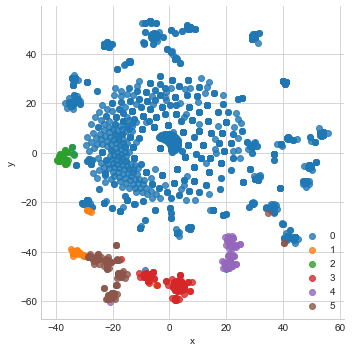

In [120]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
plt.legend(loc='lower right')
plt.show()

In [121]:
def tsne_run(lr, perp):
    start = time.time()

    X = df_all2['violation_data']
    y = df_all2['facility_type']

    min_df = 0.01
    max_df = 0.90

    vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
    X_dtm = vect.fit_transform(X)

    kmeans = KMeans(n_clusters=6, random_state=10)
    kmeans.fit(X_dtm)
    labels = kmeans.predict(X_dtm)
    
    kmeans_df = pd.DataFrame()
    kmeans_df['violation_text'] = df_all2['trim_violation_text']
    kmeans_df['facility_type'] = df_all2['facility_type']
    kmeans_df['Total_Settlement'] = df_all2['Total']
    kmeans_df['Cluster'] = labels

    model = TSNE(learning_rate=lr, perplexity=perp)
    transformed = model.fit_transform(X_dtm.toarray())

    tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
    tsne_df['violation_text'] = kmeans_df['violation_text']
    tsne_df['facility_type'] = kmeans_df['facility_type']
    tsne_df['Total_Settlement'] = kmeans_df['Total_Settlement'] 
    tsne_df['Cluster'] = labels

    plt.figure(figsize=(20,10))
    sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
    plt.legend(loc='lower right')
    plt.show()

    end = time.time()
    print('Elapsed time: ', end - start, 'seconds')

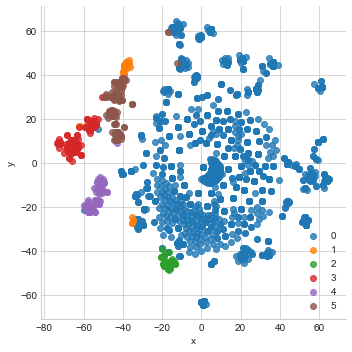

Elapsed time:  105.65397024154663 seconds


In [122]:
tsne_run(90, 50)

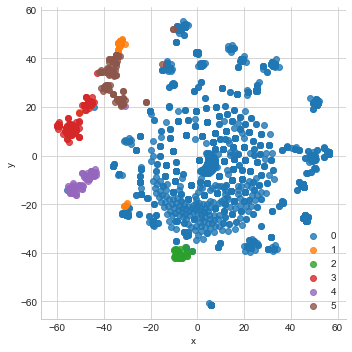

Elapsed time:  106.7884259223938 seconds


In [123]:
tsne_run(100, 50)

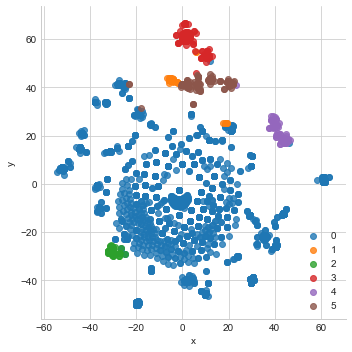

Elapsed time:  110.7059531211853 seconds


In [124]:
tsne_run(150, 50)

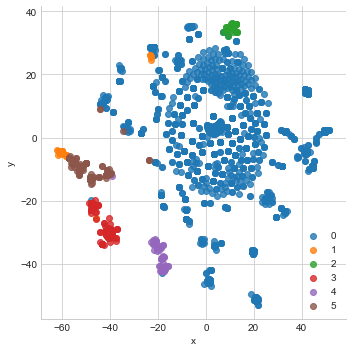

Elapsed time:  113.12308692932129 seconds


In [125]:
tsne_run(200, 50)

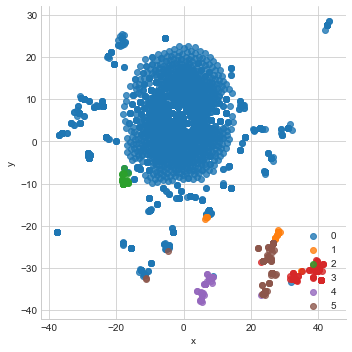

Elapsed time:  128.02586579322815 seconds


In [126]:
tsne_run(250, 50)